In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
import seaborn as sns
from datetime import datetime
import csv

In [20]:
df=pd.read_csv('chicago_crimes_2021.csv',parse_dates=['Date'], nrows=25000)
df_iucr=pd.read_csv('Chicago_IUCR__Codes.csv')
df['Date']=pd.to_datetime(df['Date'])
df['Date2'] = df['Date'].dt.date
df['Time'] = df['Date'].dt.time
print(df.columns)

df.set_index(['Date2'],inplace=True)
df.sort_index(inplace=True)


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Date2', 'Time'],
      dtype='object')


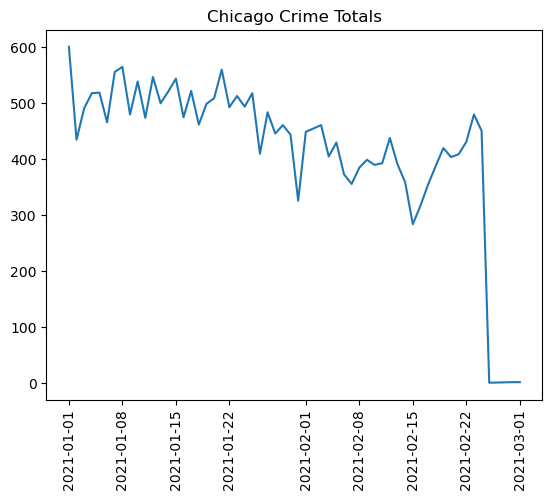

In [21]:
result=df.groupby(df.index).size()
plt.plot(result.index,result.values)
plt.xticks(rotation=90)
plt.title('Chicago Crime Totals')
plt.show()

In [22]:
dict_iucr=defaultdict(int)
dict_fbi_code=defaultdict(int)
dict_arrest_code=defaultdict(int)
list_descriptions=sorted(df['Description'].unique())

iucr_codes={}
for key,item in df_iucr.iterrows():
    iucr_codes[item['IUCR']]=item['PRIMARY DESCRIPTION'] + ' '+item['SECONDARY DESCRIPTION']
print(iucr_codes)

#print(list_descriptions)

{'110': 'HOMICIDE FIRST DEGREE MURDER', '130': 'HOMICIDE SECOND DEGREE MURDER', '141': 'HOMICIDE INVOLUNTARY MANSLAUGHTER', '142': 'HOMICIDE RECKLESS HOMICIDE', '261': 'CRIM SEXUAL ASSAULT AGGRAVATED: HANDGUN', '262': 'CRIM SEXUAL ASSAULT AGGRAVATED: OTHER FIREARM', '263': 'CRIM SEXUAL ASSAULT AGGRAVATED: KNIFE/CUT INSTR', '264': 'CRIM SEXUAL ASSAULT AGGRAVATED: OTHER DANG WEAPON', '265': 'CRIM SEXUAL ASSAULT AGGRAVATED: OTHER', '266': 'CRIM SEXUAL ASSAULT PREDATORY', '271': 'CRIM SEXUAL ASSAULT ATTEMPT AGG: HANDGUN', '272': 'CRIM SEXUAL ASSAULT ATTEMPT AGG: OTHER FIREARM', '273': 'CRIM SEXUAL ASSAULT ATTEMPT AGG: KNIFE/CUT INSTR', '274': 'CRIM SEXUAL ASSAULT ATTEMPT AGG: OTHER DANG WEAPON', '275': 'CRIM SEXUAL ASSAULT ATTEMPT AGG: OTHER', '281': 'CRIM SEXUAL ASSAULT NON-AGGRAVATED', '291': 'CRIM SEXUAL ASSAULT ATTEMPT NON-AGGRAVATED', '312': 'ROBBERY ARMED:KNIFE/CUTTING INSTRUMENT', '313': 'ROBBERY ARMED: OTHER DANGEROUS WEAPON', '031A': 'ROBBERY ARMED: HANDGUN', '031B': 'ROBBERY ARME

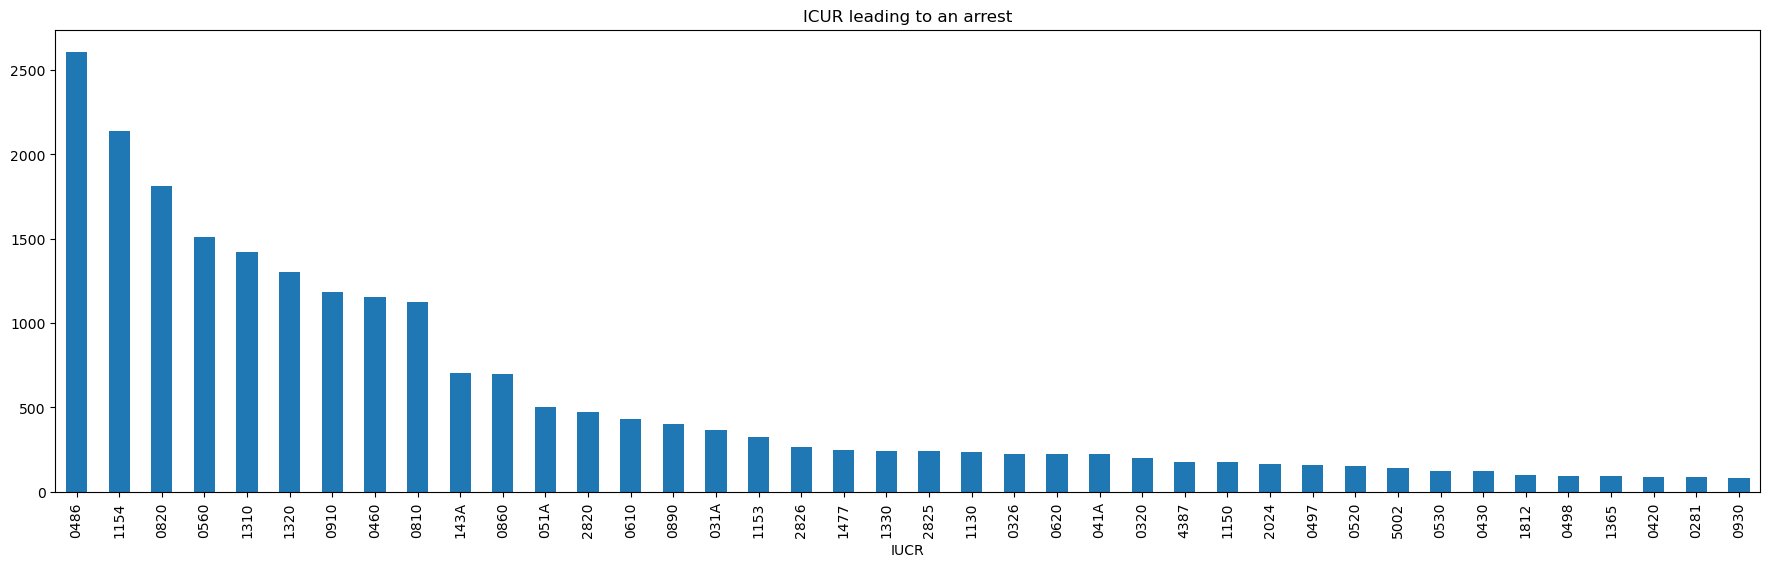

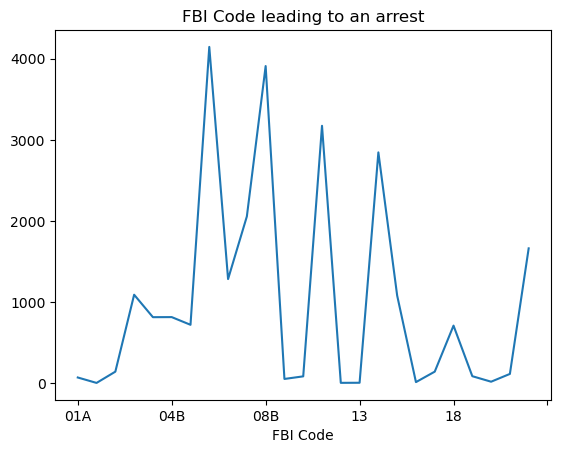

In [23]:
df['ArrestInt']=df['Arrest'].apply(lambda x: 0 if x=='true' else 1)
df['DomesticInt']=df['Domestic'].astype(bool).astype(int)

iucr_arrests=df.groupby(['IUCR'])['ArrestInt'].sum().nlargest(40).sort_values(ascending=False)
plt.figure(figsize=(22,6))
iucr_arrests.plot(kind='bar')
plt.title('ICUR leading to an arrest')
plt.show()

fbi_arrests=df.groupby(['FBI Code'])['ArrestInt'].sum()
fbi_arrests.plot()
plt.title('FBI Code leading to an arrest')
plt.show()



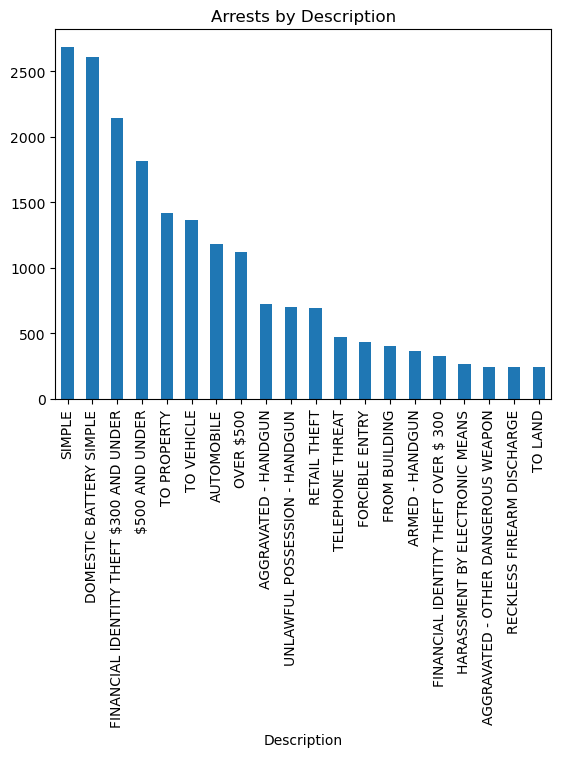

In [24]:
description_arrests=df.groupby('Description')['ArrestInt'].apply(lambda x: x.sum()).sort_values(ascending=False).nlargest(20)
description_arrests.plot(kind='bar')
plt.title('Arrests by Description')
plt.xticks(rotation=90)
plt.show()


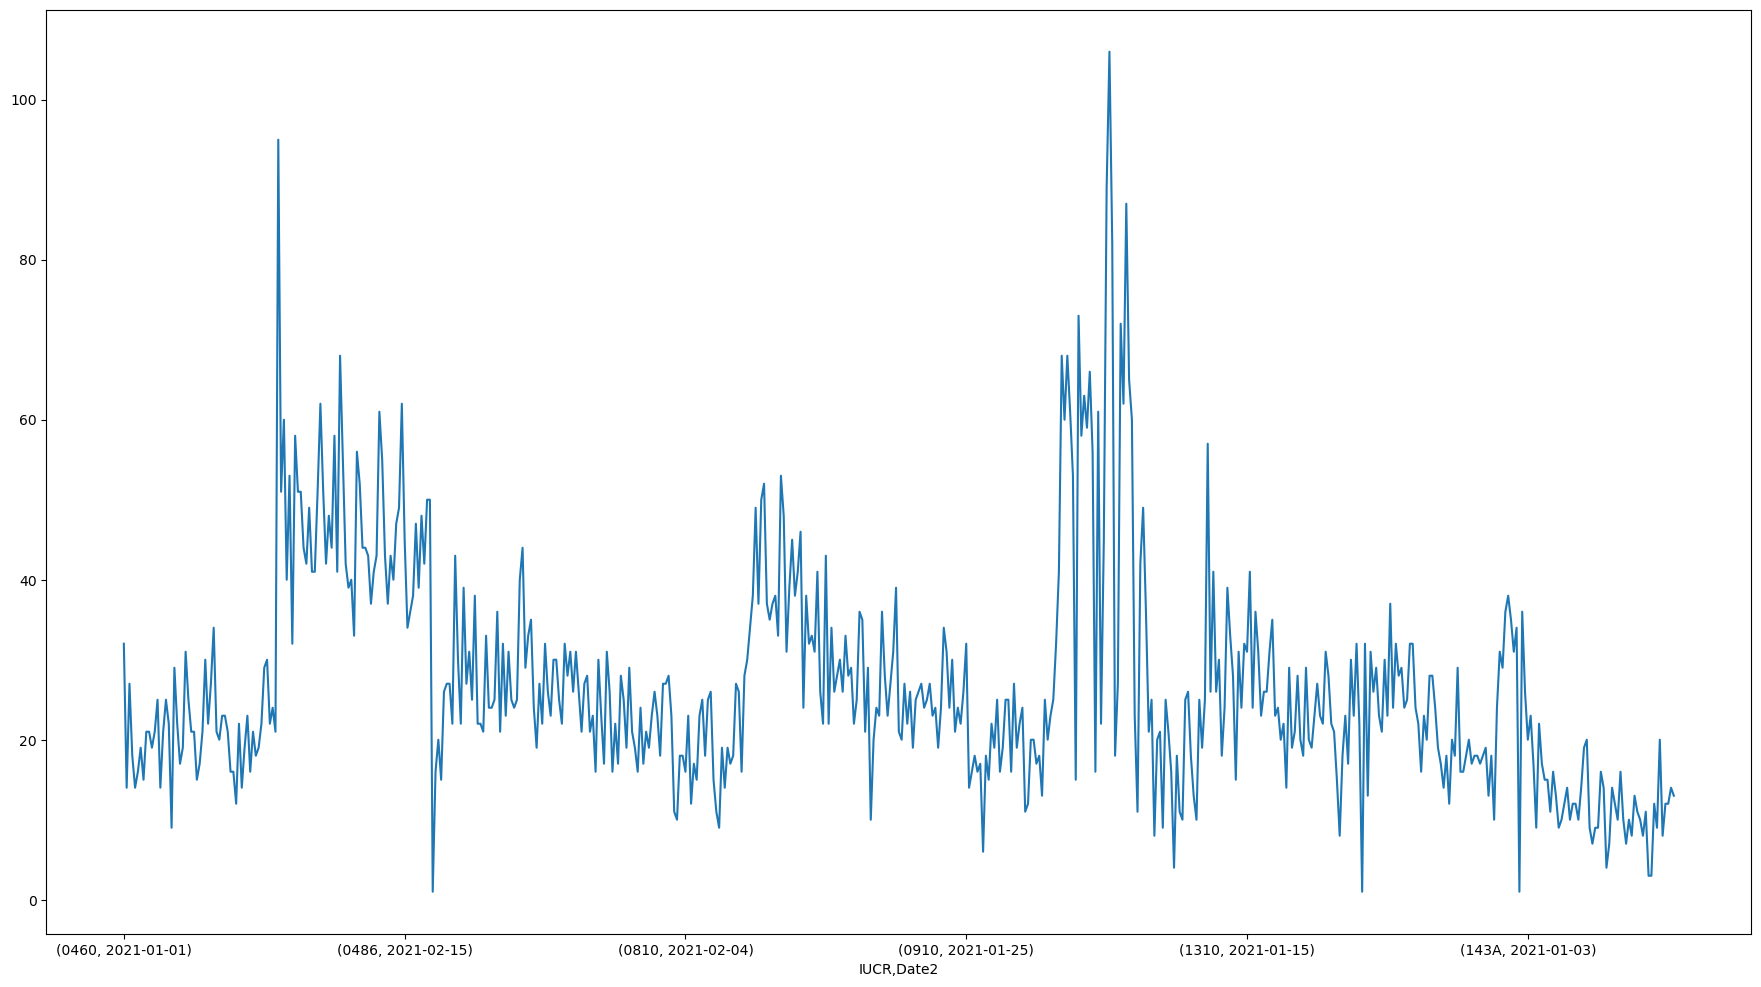

In [25]:
#iucr_top_40=iucr_arrests.index
iucr_top_10=df.groupby(['IUCR'])['ArrestInt'].sum().nlargest(10).sort_values(ascending=False).index
filter=df['IUCR'].isin(iucr_top_10)
results=df[filter]
#print(results)

plt.figure(figsize=(22,12))
results=results.groupby(['IUCR',results.index]).size().plot()
plt.show()

#sns.barplot(x=results.values, y=results.index)
#plt.show()

In [26]:
print("Find Crimes per Month")

Find Crimes per Month


In [27]:
crimes_by_month=Counter()

for key,item in df.iterrows():
    date=item.Date
    crimes_by_month[date.month]+=1
    
print(crimes_by_month)    

Counter({1: 15372, 2: 9626, 3: 2})


In [28]:
print("the number of locations per month where crime occurred")

locations_by_month = defaultdict(list)
for key,item in df.iterrows():
    location=item.Location
    date=item.Date
    locations_by_month[date.month].append(location)
    
print(locations_by_month)

the number of locations per month where crime occurred
defaultdict(<class 'list'>, {1: ['(41.65456872, -87.60853111)', '(41.895813683, -87.682736874)', '(41.700301356, -87.628099309)', '(41.756471358, -87.566322728)', '(41.777503445, -87.615558861)', '(41.87046297, -87.720260149)', '(41.7866781, -87.622258352)', '(41.765745253, -87.684496164)', '(41.728955456, -87.601002411)', '(41.918896626, -87.734927621)', '(41.764525405, -87.649250086)', '(41.846982322, -87.682222562)', '(41.760550386, -87.643072353)', '(41.952194818, -87.770147051)', '(41.739320964, -87.585700823)', '(41.779907312, -87.699510196)', '(41.935754453, -87.727088707)', '(41.707455731, -87.605637491)', '(41.772283624, -87.623480478)', '(41.980373964, -87.700394763)', '(41.765094654, -87.592784027)', '(41.777309867, -87.640802922)', '(41.839464759, -87.623233908)', '(42.019367682, -87.670044883)', '(41.872796121, -87.704122868)', '(41.926343892, -87.737456076)', '(41.778458343, -87.697031388)', '(41.930459856, -87.643753

In [29]:
print('Find the most common locations where crime occurs')

for month,locations in locations_by_month.items():
    location_count=Counter(locations)
    print(month)
    print(location_count.most_common(3))
    
print('Place where to be careful: Ohara airport, Jay Pritzer, Dearborn Park, Humbolt Park')

Find the most common locations where crime occurs
1
[(nan, 111), ('(41.883500187, -87.627876698)', 21), ('(41.976762981, -87.900983721)', 17)]
2
[(nan, 47), ('(41.867414944, -87.627231186)', 12), ('(41.883500187, -87.627876698)', 11)]
3
[('(41.895420644, -87.720539406)', 1), ('(41.86902427, -87.666453984)', 1)]
Place where to be careful: Ohara airport, Jay Pritzer, Dearborn Park, Humbolt Park


In [54]:
csvfile=open('chicago_crimes_2021.csv','r')

crimes_by_district = defaultdict(list)

for row in csv.DictReader(csvfile):
    counter+=1
    district=row.pop('District')
    crimes_by_district[district].append(row)


In [56]:
# Loop over the crimes_by_district using expansion as district and crimes
for district, crimes in crimes_by_district.items():
    # Print the district
    print(district)
    # Create an empty Counter object: year_count
    year_count = Counter()
    # Loop over the crimes:
    for crime in crimes:
        # If there was an arrest
        if crime['Arrest'] == 'true':
            # Convert the Date to a datetime and get the year
            year = datetime.strptime(crime['Date'], '%m/%d/%Y %I:%M:%S %p').year
            # Increment the Counter for the year
            year_count[year] += 1
            
    # Print the counter
    print(year_count)
    
print("district 11 has the most arrests for 2021")

007
Counter({2021: 1158})
006
Counter({2021: 1397})
015
Counter({2021: 914})
003
Counter({2021: 753})
004
Counter({2021: 854})
012
Counter({2021: 561})
024
Counter({2021: 443})
002
Counter({2021: 500})
010
Counter({2021: 1063})
014
Counter({2021: 494})
022
Counter({2021: 694})
018
Counter({2021: 802})
005
Counter({2021: 904})
011
Counter({2021: 2544})
009
Counter({2021: 769})
020
Counter({2021: 226})
025
Counter({2021: 1081})
008
Counter({2021: 893})
017
Counter({2021: 297})
019
Counter({2021: 565})
016
Counter({2021: 707})
001
Counter({2021: 909})
031
Counter({2021: 3})
